# Effects of the Rides Characteristics on The duration

## Investigation Overview

In this investigation, I wanted to look at the characteristics of the trip ride that could be of Influence to determine the duration. The main focus is on: Age, hour, day, user type and gender.

## Dataset Overview

The data consisted of 174952 samples and 19 features of users. The features included the Age, hour, day, user_type as well as other attributes such as start_station id, end station_id, gender, bike share, etc. This is a cleaned dataset, some wrangling were done in this dataset from the previous section, in which missing data where dropped and some changes were performed on some datatypes for effective analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load and viewing in the dataset into a pandas dataframe
trip = pd.read_csv('trip_clean.csv')
trip.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,day,month,hour,age
30424,681,2019-02-24 16:12:51.014,2019-02-24 16:24:12.142,321.0,5th St at Folsom,37.780146,-122.403071,109.0,17th St at Valencia St,37.763316,-122.421904,4762,Subscriber,Male,No,Sunday,February,16,30
97147,215,2019-02-14 17:12:38.853,2019-02-14 17:16:13.998,258.0,University Ave at Oxford St,37.872355,-122.266447,266.0,Parker St at Fulton St,37.862464,-122.264791,4990,Subscriber,Male,No,Thursday,February,17,22
154961,296,2019-02-05 11:45:53.069,2019-02-05 11:50:49.739,195.0,Bay Pl at Vernon St,37.812314,-122.260779,182.0,19th Street BART Station,37.809013,-122.268247,1579,Subscriber,Female,No,Tuesday,February,11,34
62363,626,2019-02-20 09:52:02.118,2019-02-20 10:02:28.662,31.0,Raymond Kimbell Playground,37.783813,-122.434559,321.0,5th St at Folsom,37.780146,-122.403071,6082,Subscriber,Male,No,Wednesday,February,9,26
61648,350,2019-02-20 11:58:03.438,2019-02-20 12:03:54.437,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,50.0,2nd St at Townsend St,37.780526,-122.390288,5561,Subscriber,Female,No,Wednesday,February,11,26


## Distribution of Duration(sec)

The distribution has a long tail when plotted on a standard scale, In other to have a clearer view of the distribution, we transformed the plot the duration_sec using a log-scale. The distribution is a unimodal, with more number of trips covered below 2000sec  and having it's peak around 600sec then starts to fall around 800sec to 20000sec

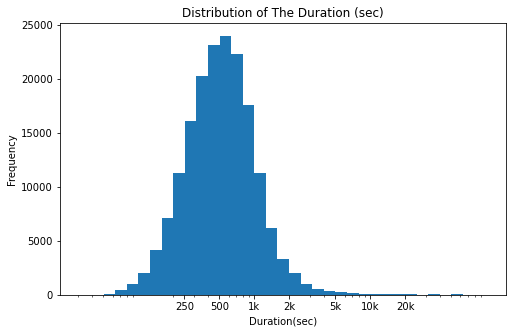

In [3]:
# Showing the distribution in a log scale
bins = 10 ** np.arange(1.5, np.log10(trip['duration_sec'].max())+0.1, 0.1)

plt.figure(figsize=[8, 5])
plt.hist(data = trip, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([250, 500, 1e3, 2e3, 5e3, 1e4, 2e4], [250, 500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration(sec)')
plt.ylabel('Frequency')
plt.title('Distribution of The Duration (sec)')
plt.show()

### Distribution of Age(years)

This distribution tells us the range in ages of users in the dataset and what age group or range of age participated more. Plotting the distribution on a log scale showed that more young people participated between the age of 20 and 40.

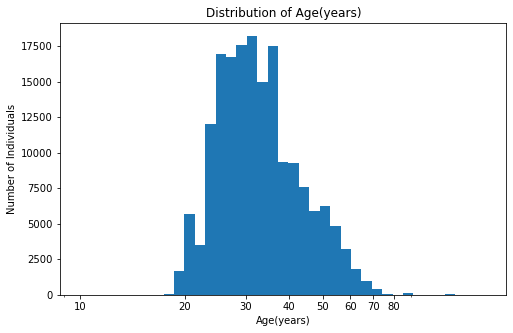

In [4]:
bins = 10 ** np.arange(1.0, np.log10(trip['age'].max())+0.03, 0.03)
plt.figure(figsize=[8, 5])
plt.hist(data = trip, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80], [10, 20, 30, 40, 50, 60, 70, 80])
plt.xlabel('Age(years)')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Age(years)')
plt.show();

### Percentage of the User Types

Viewing the percentage of User types in the datasets in a pie chart, shows that there is higher percentage of subscribers of about to 90.5% in comparison with 9.5% of customers users.

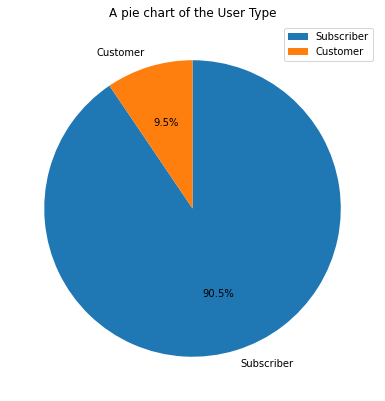

In [5]:
# Plotting the user_type on a pie chart
plt.figure(figsize=[10,15])
sort_count = trip['user_type'].value_counts()
a_color = sb.color_palette()[0]
plt.subplot(2,1,1)
plt.pie(sort_count, labels= sort_count.index, startangle=90, counterclock=False, autopct='%.1f%%')
plt.legend()
plt.title('A pie chart of the User Type');

## Duration and Age

Viewing the coorelation between the duration_sec and age in a heatmap is highly significant to note, as expected young people between the age of 20 to 40 have longer duration of trip. 

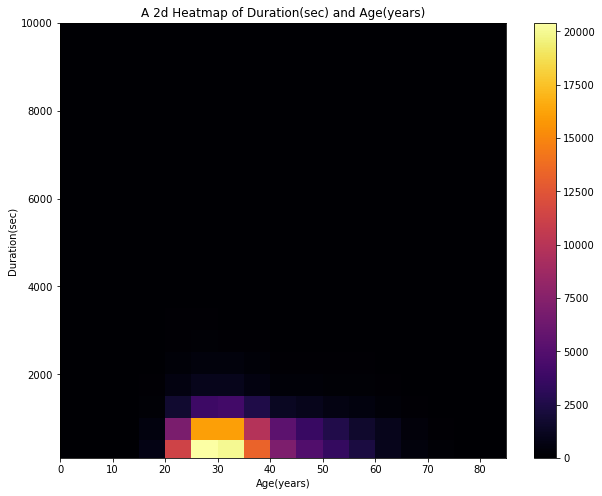

In [6]:
# heatmap of duration and age
bins_x = np.arange(0, trip['age'].max()+5, 5)
bins_y = np.arange(0, trip['duration_sec'].max()+500, 500)
plt.figure(figsize=[10,8])
plt.hist2d(data=trip, x='age', y='duration_sec', cmap='inferno', bins =[bins_x,bins_y])
plt.axis([0, 85, 100, 10000])
plt.colorbar()
plt.title('A 2d Heatmap of Duration(sec) and Age(years)')
plt.xlabel('Age(years)')
plt.ylabel('Duration(sec)')
plt.show()

## Duration vs Gender and Duration vs User Type

We see that despite the percentage of male being the most users in the distribution of the member_gender, when compare with the duration we have more percentage of female and other genger riding longer than the male.
Likewise in user_type we observed that higher percentage of customers make longer trip in comparison with the subscribers.

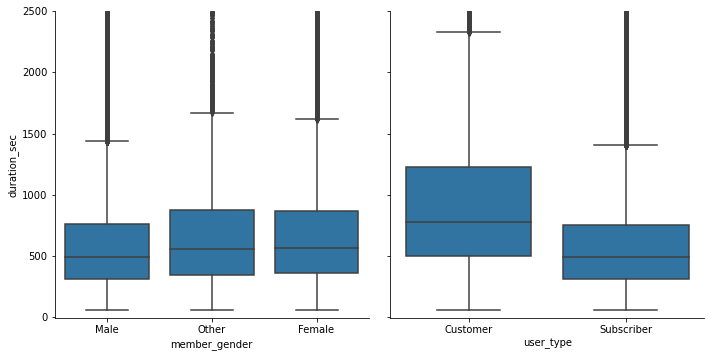

In [7]:
# Defining a function for plotting a boxplot
def boxgrid(x, y, **kwargs):
    base_color = sb.color_palette()[0]
    sb.boxplot(x,y, color=base_color)
    
# plotting a boxplot of user_type and member_gender on duration   
g = sb.PairGrid(data=trip, y_vars='duration_sec', x_vars=['member_gender', 'user_type'], height=5)
g.map(boxgrid);
plt.ylim([-5,2500])
plt.show();

### Rides Duration, Day and User Type 

Customers have tend to spend more trip time with most duration occuring during weekends and subscribers having being consistent in their rides duration with little increase on weekends.

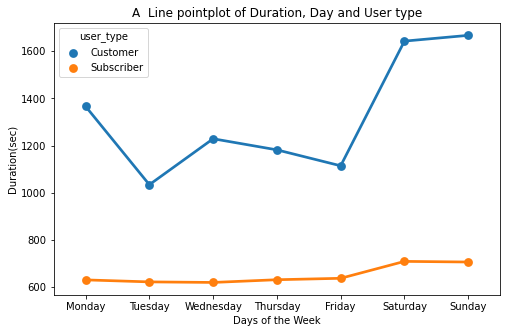

In [8]:
# Plotting a pointplot for day, duration and user type
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8,5))
sb.pointplot(data=trip, x='day', y='duration_sec', hue='user_type',ci=None, order=days)
plt.xlabel('Days of the Week')
plt.ylabel('Duration(sec)')
plt.title('A  Line pointplot of Duration, Day and User type');

### Rides Duration, Gender and User Type

We have it that more percentage of other gender spend more duration on trips for both customers and subscribers than any other gender, with the females being the second more and males being the least.

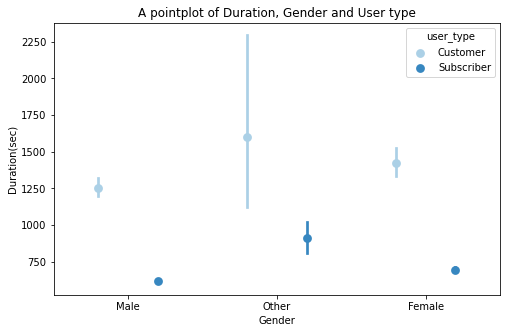

In [9]:
# Plotting a pointplot for member_gender, duration and user type
plt.figure(figsize=(8,5))
ax = sb.pointplot(data=trip, x='member_gender', y='duration_sec', hue='user_type', palette='Blues', linestyles='', dodge = 0.4)
ax.set_yticklabels([],minor = True)
plt.xlabel('Gender')
plt.ylabel('Duration(sec)')
plt.title('A pointplot of Duration, Gender and User type');